### **Non-spatial data analysis**

In [233]:
# Import Neccssery libraris
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [234]:
# Dowenload the Sample district dataset after the data engineering prosess
df = pd.read_csv('../data/sample_district/restaurants_sample_district.csvs')

### **Exploratory Data Analysis (EDA)**

In [235]:
df.head()

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals,price_code,postcode
0,بهارات الأولين,Middle Eastern Restaurant,"الرياض, المملكة العربية السعودية",24.525009,46.687660,moderate,8,10,6,7.800000,9.0,1,NaN
1,‏سيارة الأيسكريم,"Food Truck, Ice Cream Shop","الرياض, المملكة العربية السعودية",24.528172,46.692566,cheap,0,1,0,7.536018,NaN,0,NaN
2,Pizza Hut (بيتزا هت),Pizza Place,"حي الشفاء (طريق ديراب), الرياض, المملكة العربي...",24.530758,46.687128,cheap,4,4,0,7.536018,NaN,0,NaN
3,Croissant Cafe || كروسان كافيه,Café,المملكة العربية السعودية,24.530341,46.688500,cheap,0,3,0,7.536018,NaN,0,NaN
4,بريڤي لاونج,Café,"الرياض, المملكة العربية السعودية",24.528991,46.729956,cheap,2,12,1,7.536018,NaN,0,NaN


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1804 non-null   object 
 1   categories     1804 non-null   object 
 2   address        1804 non-null   object 
 3   lat            1804 non-null   float64
 4   lng            1804 non-null   float64
 5   price          1804 non-null   object 
 6   likes          1804 non-null   int64  
 7   photos         1804 non-null   int64  
 8   tips           1804 non-null   int64  
 9   rating         1804 non-null   float64
 10  ratingSignals  687 non-null    float64
 11  price_code     1804 non-null   int64  
 12  postcode       740 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 183.3+ KB


In [237]:
# We can notice here that there is many outliners since 75% of likes	photos	tips ratingSignals have low numbers
# but the max give us a very big number
df.describe()

,lat,lng,likes,photos,tips,rating,ratingSignals,price_code,postcode
count,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,687.000000,1804.000000,740.000000
mean,24.723046,46.712408,43.237805,122.931264,9.105322,7.514486,137.385735,0.261086,13235.155405
std,0.095135,0.068753,241.973409,850.658046,34.925164,0.577879,380.138215,0.494018,2873.793568
min,24.525009,46.496517,0.000000,0.000000,0.000000,5.100000,0.000000,0.000000,966.000000
25%,24.676435,46.651985,0.000000,1.000000,0.000000,7.536018,13.000000,0.000000,12372.000000
50%,24.728208,46.695157,2.000000,3.000000,0.000000,7.536018,30.000000,0.000000,13243.000000
75%,24.808028,46.772560,12.000000,17.000000,3.000000,7.536018,101.500000,0.000000,13413.000000
max,24.939546,46.855522,6064.000000,17997.000000,473.000000,9.300000,5584.000000,3.000000,65724.000000


In [238]:
df_clean = df.copy()
#df_clean = df.replace([0, 0.0], np.nan)

# Drop rows with any NaN values
#df_clean = df_clean.dropna()

# Optional: reset index
#df_clean = df_clean.reset_index(drop=True)

### Before answering any questions, we should first explore the data using three different types of analysis: Univariate, Bivariate, and Multivariate Analysis.

## Univariate Analysis

<Axes: xlabel='count', ylabel='price'>

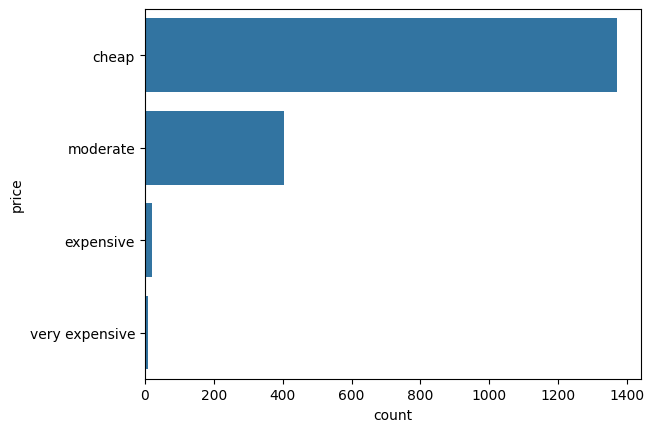

In [239]:
# Starting off with a check on the price feature and how the data is distribute it
order = ['cheap','moderate','expensive','very expensive']
sns.countplot(df['price'],order=order)

In [240]:
df_multi = df.copy()
df_multi['categories'] = df_multi['categories'].str.split(',')

# 2) One row per category
df_multi = df_multi.explode('categories')

# 3) Clean spaces
df_multi['categories'] = df_multi['categories'].str.strip()

# 4) Now count categories
cat_counts = df_multi['categories'].value_counts()

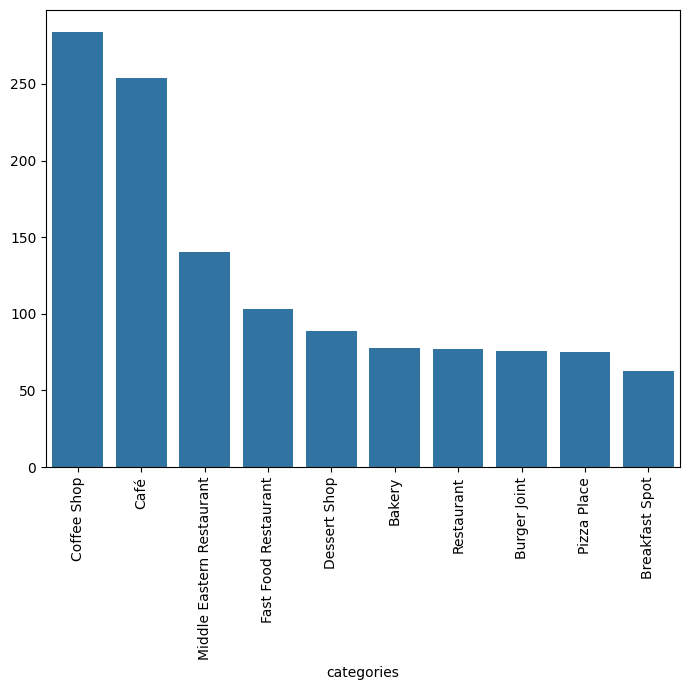

In [241]:
top_n = 10
top_cats = cat_counts.head(top_n)

plt.figure(figsize=(7,7))
sns.barplot(x=top_cats.index, y=top_cats.values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Bivariate analysis**

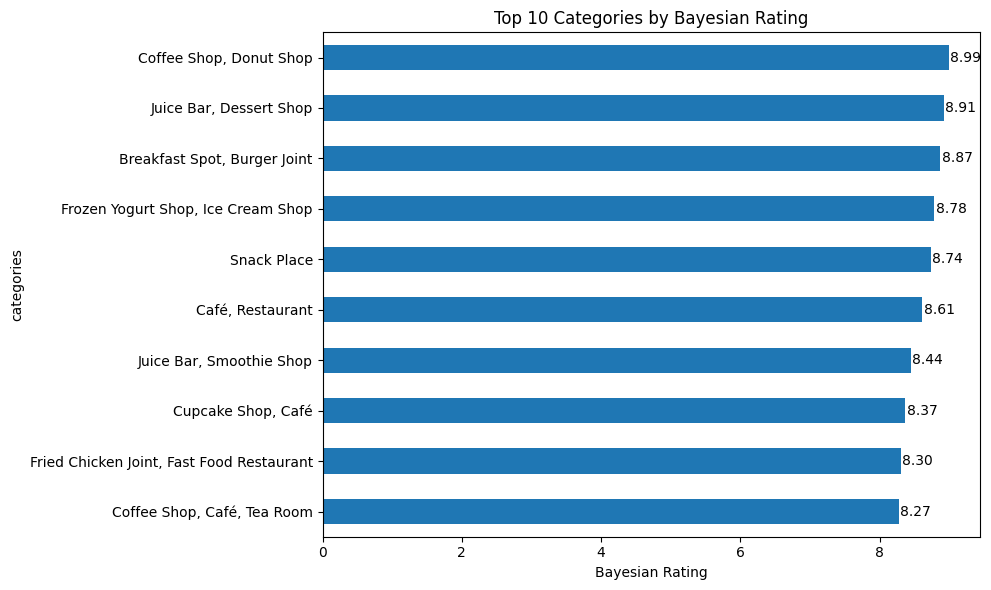

In [242]:
df_cat = df_clean.copy()
C = df_cat['rating'].mean()
m = 50

df_cat['bayes_score'] = (df_cat['ratingSignals'] / (df_cat['ratingSignals'] + m)) * df_cat['rating'] + \
                        (m / (df_cat['ratingSignals'] + m)) * C

cat_stats = df_cat.groupby('categories')['bayes_score'].mean().sort_values(ascending=False)

top_bayes = cat_stats.head(10)

plt.figure(figsize=(10, 6))
top_bayes.plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Bayesian Rating')
plt.title('Top 10 Categories by Bayesian Rating')

for i, v in enumerate(top_bayes):
    plt.text(v + 0.02, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()


## **Multivariate Analysis**

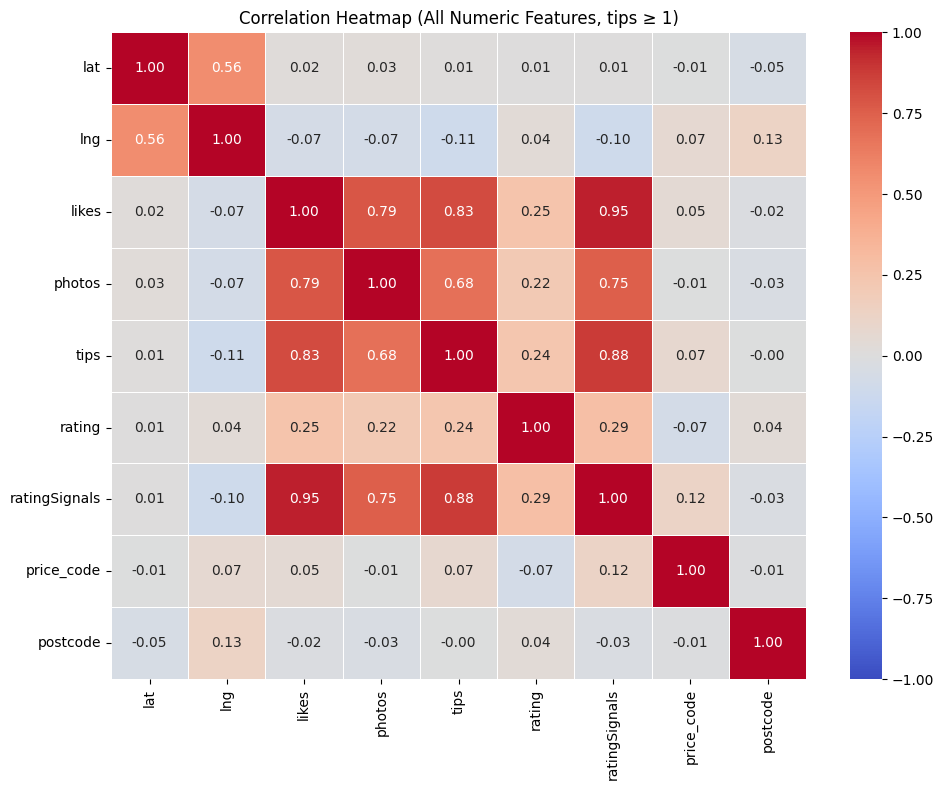

In [243]:
df_clean = df_clean.copy()
df_corr = df_clean.select_dtypes(include='number')
corr_matrix = df_corr.corr(method='pearson')
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)

plt.title("Correlation Heatmap (All Numeric Features, tips ≥ 1)")
plt.tight_layout()
plt.show()

# Observations from the Heatmap:
The heatmap indicates a negative correlation between longitude and tips. This raises an interesting question:

Q1) “Does the interaction between customers and tips decrease as we move toward the eastern side of Riyadh?”

Rows after filtering lng between 46.60 and 46.85: 866


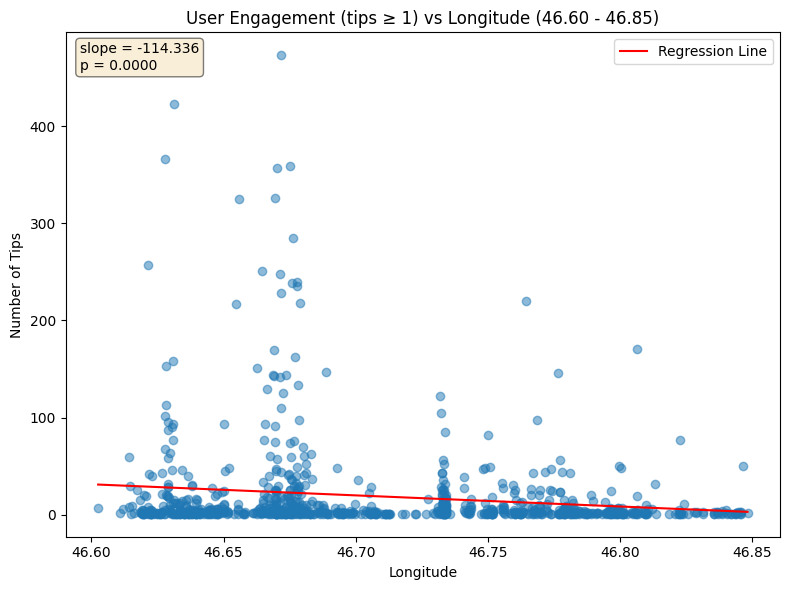

           count       mean
region_WE                  
East         374  10.197861
West         492  25.623984


In [244]:
df_nonzero = df_clean[df_clean['tips'] > 0].copy()
df_nonzero = df_nonzero[(df_nonzero['lng'] >= 46.60) & (df_nonzero['lng'] <= 46.85)]
print(f"Rows after filtering lng between 46.60 and 46.85: {len(df_nonzero)}")

plt.figure(figsize=(8, 6))

plt.scatter(df_nonzero['lng'], df_nonzero['tips'], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Number of Tips")
plt.title("User Engagement (tips ≥ 1) vs Longitude (46.60 - 46.85)")

X = df_nonzero[['lng']].values
y = df_nonzero['tips'].values

model = LinearRegression()
model.fit(X, y)

x_vals = np.linspace(df_nonzero['lng'].min(), df_nonzero['lng'].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_vals)
plt.plot(x_vals, y_pred, color='red', label='Regression Line')

r, p_value = pearsonr(df_nonzero['lng'], df_nonzero['tips'])
r2 = r2_score(y, model.predict(X))

plt.text(
    0.02, 0.98,
    f"slope = {model.coef_[0]:.3f}\np = {p_value:.4f}",
    transform=plt.gca().transAxes,
    verticalalignment='top',
    bbox=dict(boxstyle="round", fc="wheat", alpha=0.5)
)

plt.legend()
plt.tight_layout()
plt.show()

split_lng = 46.71
df_nonzero['region_WE'] = np.where(df_nonzero['lng'] <= split_lng, 'West', 'East')

region_stats = df_nonzero.groupby('region_WE')['tips'].agg(['count', 'mean'])
print(region_stats)

# The regression line shows a negative slope, meaning as we move eastward (higher longitude), the number of tips tends to decrease.

Splitting the region at longitude 46.71:

West (lng < 46.71): Average tips ≈ 25.62

East (lng ≥ 46.71): Average tips ≈ 10.20

Conclusion:
There is a clear decline in customer engagement (tips) as we move from west to east within Riyadh. This aligns with the negative correlation observed in the heatmap and the regression plot.

# We observed that many restaurants appear as outliers because they receive significantly less engagement than 75% of other restaurants. This raises another question:
Q2) Do restaurants with higher user engagement tend to receive higher ratings compared to others?

/tmp/ipython-input-3709837129.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_ratings, x='engagement_group', y='rating', palette='viridis')


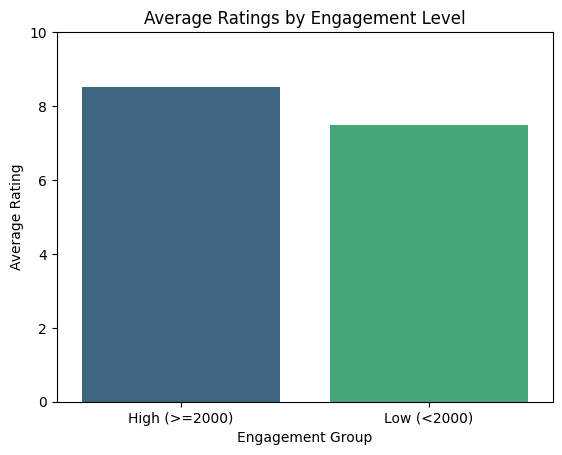

In [245]:

# Create a new column for the group
df['engagement_group'] = df['ratingSignals'].apply(lambda x: 'High (>=2000)' if x >= 500 else 'Low (<2000)')

# Calculate mean ratings
mean_ratings = df.groupby('engagement_group')['rating'].mean().reset_index()

# Plot
sns.barplot(data=mean_ratings, x='engagement_group', y='rating', palette='viridis')
plt.title('Average Ratings by Engagement Level')
plt.ylabel('Average Rating')
plt.xlabel('Engagement Group')
plt.ylim(0, 10)
plt.show()


# Q3) Do restaurants with high ratingSignals tend to fall into the "expensive & very expensive" categorys?

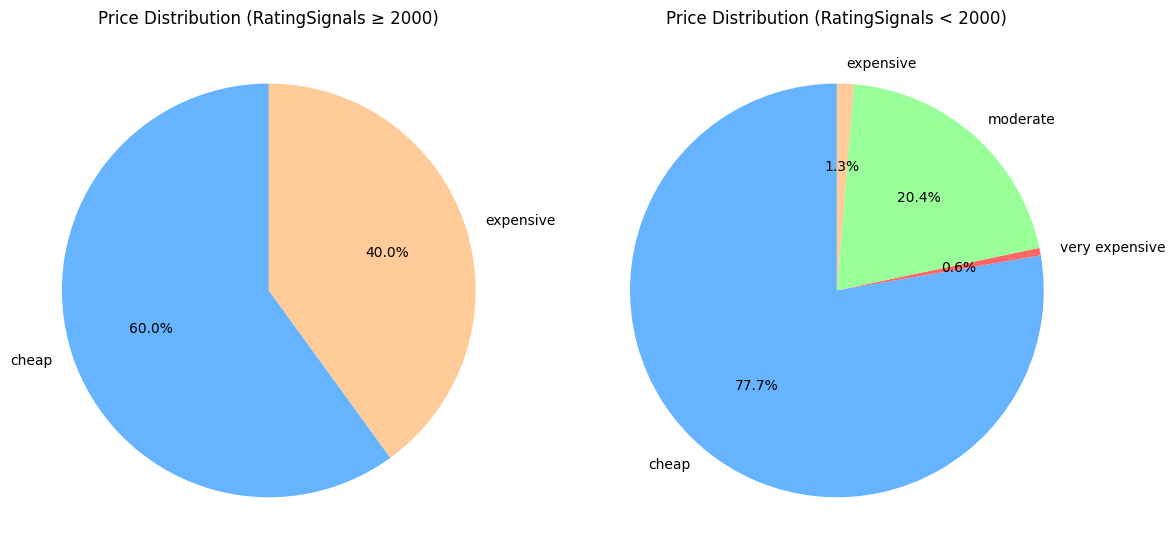

In [246]:
# Split the data
high_engagement = df[df['ratingSignals'] >= 2000]
low_engagement = df[df['ratingSignals'] < 2000]

# Categories and order
categories = ['cheap', 'moderate', 'expensive', 'very expensive']
plot_order = ['cheap', 'very expensive', 'moderate', 'expensive']

# Color map
color_map = {'cheap':'#66b3ff', 'moderate':'#99ff99', 'expensive':'#ffcc99', 'very expensive':'#ff6666'}

# Compute counts and reorder
high_counts = high_engagement['price'].value_counts(normalize=True).reindex(categories, fill_value=0) * 100
high_counts = high_counts[plot_order]
low_counts = low_engagement['price'].value_counts(normalize=True).reindex(categories, fill_value=0) * 100
low_counts = low_counts[plot_order]

# Remove 0% categories
high_counts = high_counts[high_counts > 0]
low_counts = low_counts[low_counts > 0]

# Corresponding colors
high_colors = [color_map[c] for c in high_counts.index]
low_colors = [color_map[c] for c in low_counts.index]

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].pie(high_counts, labels=high_counts.index, colors=high_colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Price Distribution (RatingSignals ≥ 2000)')

axes[1].pie(low_counts, labels=low_counts.index, colors=low_colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Price Distribution (RatingSignals < 2000)')

plt.tight_layout()
plt.show()
